# Esempi di Gestione Dataset

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt

## Caricamento Dataset di Esempio da Scikit-learn

In [2]:
iris = datasets.load_iris(as_frame=True)

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
path_iris = iris['filename']
path_iris

'c:\\Users\\Pace\\Desktop\\Code\\Python\\MIA\\.MIA\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [5]:
iris['data']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [8]:
iris_df = iris['frame']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Lavoriamo con il DataFrame degli Iris

Creiamo una copia del dataframe originale su cui lavorare liberamente.

In [11]:
iris_df_copy = iris_df.copy()

Aggiungiamo una colonna con i nomi dei target, non solamente il valore numerico.

In [12]:
iris_df_copy['target_names'] = [iris['target_names'][t] for t in iris_df_copy['target']]
iris_df_copy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [13]:
iris_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   target_names       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


Guardiamo le proprietà statistiche delle varie features che descrivono i nostri fiori (usiamo iris['data'] perché siamo interessanti solo alle features).

In [14]:
iris['data'].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Un Po' di Visualizzazioni

<AxesSubplot:>

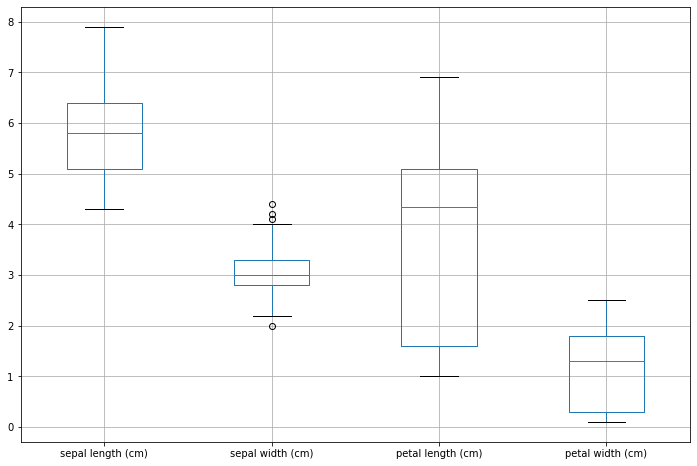

In [15]:
iris['data'].boxplot(figsize=(12,8))

<AxesSubplot:ylabel='Density'>

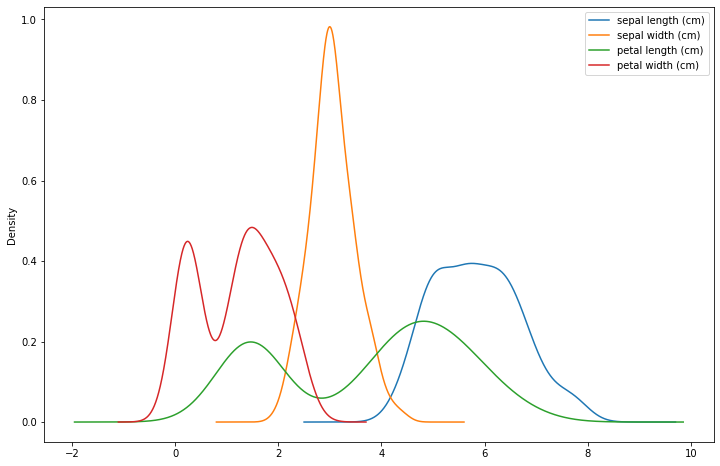

In [16]:
iris['data'].plot.density(figsize=(12,8))

<AxesSubplot:>

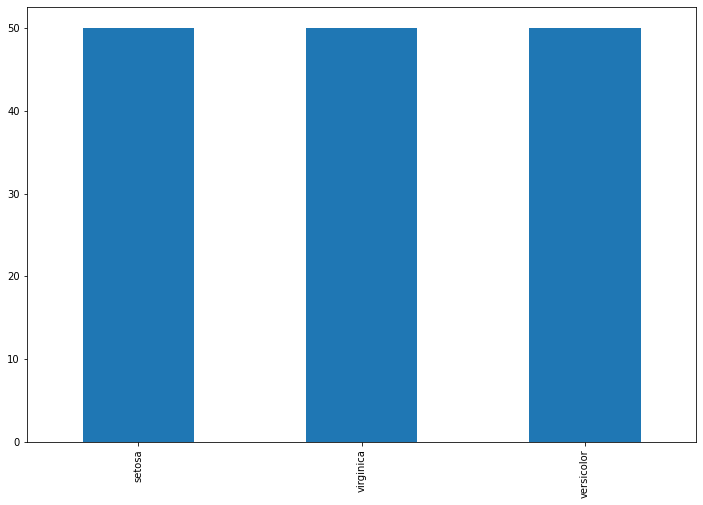

In [17]:
iris_df_copy['target_names'].value_counts().plot.bar(figsize=(12,8))

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

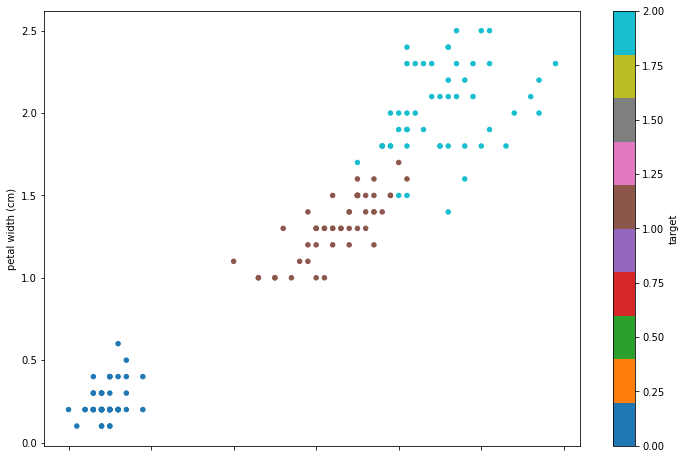

In [18]:
iris_df_copy.plot.scatter(x='petal length (cm)', y='petal width (cm)', c='target', colormap='tab10', figsize=(12,8))

## Valori Categorici

Ricordiamoci il tipo di dati salvati nelle colonne del dataframe di copia.

In [19]:
iris_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   target_names       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


Convertiamo in valori categorici il contenuto della colonna 'target_names'

In [20]:
iris_df_copy = iris_df_copy.astype({'target_names': 'category'})
# ALTERNATIVA, FORSE PIU' INTUITIVA NEL CASO DI UNA SOLA COLONNA:
# iris_df_copy['target_names'] = iris_df_copy['target_names'].astype('category')

In [21]:
iris_df_copy['target_names']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target_names, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [22]:
iris_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    int32   
 5   target_names       150 non-null    category
dtypes: category(1), float64(4), int32(1)
memory usage: 5.7 KB


### LabelEncoder di Scikit-Learn

Generiamo un oggetto della classe LabelEncoder.

In [23]:
labelenc = LabelEncoder()

''Mostriamogli'' le classi degli iris e facciamogliele numerare e memorizzare. 

In [24]:
labelenc.fit(['setosa', 'versicolor', 'virginica'])

LabelEncoder()

Creiamo una copia di iris_df_copy e sostituiamo la colonna 'target_names' con la sua trasformazione attraverso labelenc:

In [25]:
iris_df_copy2 = iris_df_copy.copy()
iris_df_copy2['target_names'] = labelenc.transform(iris_df_copy2['target_names'].values)

# CAMBIAMO ANCHE NOME ALLA COLONNA, GIA' CHE CI SIAMO
iris_df_copy2.rename(columns={'target_names': 'target_labelenc'})

iris_df_copy2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


Proviamo ad utilizzare una codifica diversa per le classi. Cambiamo casualmente l'associazione classe-numero dell'oggetto labelenc (si potrebbe anche crearne uno nuovo).
Per cambiare l'associazione, si può cambiare manualmente l'ordine degli elementei nell'attributo 'classes_'.

In [26]:
labelenc.classes_ = labelenc.classes_[np.random.permutation(len(labelenc.classes_))]
labelenc.classes_

array(['setosa', 'virginica', 'versicolor'], dtype='<U10')

Ripetiamo quanto fatto prima su una nuova copia del dataframe.

In [27]:
iris_df_copy3 = iris_df_copy.copy()
iris_df_copy3['target_names'] = labelenc.transform(iris_df_copy3['target_names'].values)

iris_df_copy3.rename(columns={'target_names': 'target_labelenc'})

iris_df_copy3

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


## One-hot Encoding

Utilizziamo la funzione get_dummies per trasformare la colonna 'target_names' di iris_df_copy secondo la codifica 'one-hot'.
Notare come la colonna 'target' non venga alterata poiché il tipo di dato è salvato come intero e non come 'category' o 'object'.

In [28]:
pd.get_dummies(iris_df_copy)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names_setosa,target_names_versicolor,target_names_virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,1
146,6.3,2.5,5.0,1.9,2,0,0,1
147,6.5,3.0,5.2,2.0,2,0,0,1
148,6.2,3.4,5.4,2.3,2,0,0,1
